# Proyecto Modulo 2

+ Integrante1: Corrales Camacho Cuauhtémoc
+ Integrante2: Sánchez Covarrubias Marco Antonio
+ Integrante3: 

### *"Análisis de rendimientos de compañías automotrices y predicciones de precios para el año 2020"*

**Objetivo general:**
+ Elaborar un análisis de precios y rendimientos accionarios de corporaciones automovilísticas.

**Objetivos específicos:**
+ Investigar los valores accionarios del periodo 2018-2019 de empresas automotrices económicas. 
+ Calcular los rendimientos porcentuales de las compañías anteriores.
+ Predecir precios accionarios del próximo año para cada empresa correspondiente.

**Planteamiento del proyecto**

Durante el estudio de este modulo, se han visto en clase los siguientes temas: Simulación Montecarlo, Integración Montecarlo, Fractales Aleatorios y Probabilidad Precio Umbral. Para la elaboración de este proyecto, se eligió el último tópico, ya que todos los integrantes del equipo son estudiantes de finanzas. Se decidió poner en desarrollar el tema de Probabilidad Precio Umbral porque es el más relacionado al área de nuestra carrera. 

El proyecto conciste en un análisis considerablemente detallado acerca de los valores accionarios que las empresas automototrices Ford, Volkswagen, Honda y Nissan generaron desde el inicio del año 2018 hasta la actualidad. Con ellos se calcularan los rendimientos en un determinado periodo de tiempo mediante el uso de un sistema probabilístico.

Al final, con los resultados obtenidos, se calcularan matematicamente una lista de posibles precios accionarios futuros y se daran a conocer nuestras conclusiones finales.

In [1]:
import pandas_datareader as web
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

**Modelo del problema**

In [2]:
#Se importa el historico
def get_close(names,start,end):
    close=web.DataReader(name=names,data_source='yahoo',start=start,end=end)
    return close['Adj Close']

In [4]:
#Instrumentos
nombres=['F','VOW3.DE','HMC','NSANY']
# Fechas de interés (inicio y fin): 2013-2017
fecha_inicio='2018-01-01'
fecha_fin='2019-7-5'
# Función DataReader
cierres=get_close(nombres,fecha_inicio,fecha_fin)
cierres

Symbols,F,HMC,NSANY,VOW3.DE
Date,,,,
2018-01-02,11.226595,33.041203,20.040001,156.690155
2018-01-03,11.315272,33.338268,20.250000,162.118057
2018-01-04,11.510363,33.980312,20.230000,164.954941
2018-01-05,11.705453,34.133633,20.389999,169.456100
2018-01-08,11.661115,34.306122,20.440001,170.061310
2018-01-09,11.599042,34.037807,20.540001,170.439560
2018-01-10,11.554701,34.766090,20.590000,168.510483
2018-01-11,11.669983,34.584023,20.750000,168.132233
2018-01-12,11.732057,34.430698,20.750000,170.042404


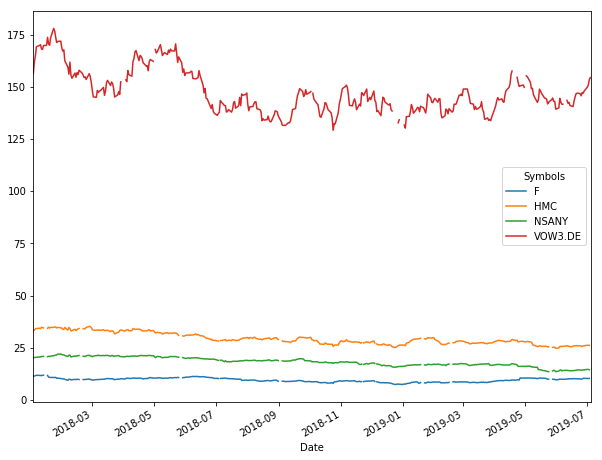

In [5]:
cierres.plot(figsize=(10,8));

**Solución del problema y sus respectivas gráficas**

**Analísis de los resultados y conclusiones**

**Referencias**